In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Generate a periodic time series for real data
t = np.linspace(0, 2 * np.pi, 100)
real_data = np.sin(t)

# Calculate max and min values at each time point (for illustration, we use a constant offset)
max_values = real_data + 0.5
min_values = real_data - 0.5

# Generate synthetic time series with similar periodicity
synthetic_data = np.sin(t + 0.2)  # Shifted sine wave for illustration

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(t, max_values, label='Max values', color='red')
plt.plot(t, min_values, label='Min values', color='blue')
plt.fill_between(t, min_values, max_values, color='gray', alpha=0.3)
plt.plot(t, synthetic_data, label='Synthetic data', color='orange')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Evaluation Metric for Synthetic Time Series')
plt.legend()
plt.show()


In [ ]:
def dynamic_time_warping_dist(X, Y, norm=np.linalg.norm):
    N = len(X)
    M = len(Y)
    D = np.zeros((N + 1, M + 1), dtype=float)
    D[:, 0] = np.inf
    D[0, :] = np.inf
    D[0][0] = 0

    for i in range(1, N + 1):
        for j in range(1, M + 1):
            m = min([D[i-1][j], D[i][j-1], D[i - 1][j - 1]])
            D[i][j] = norm(X[i - 1] - Y[j-1]) + m
    
    return D, D[N][M]


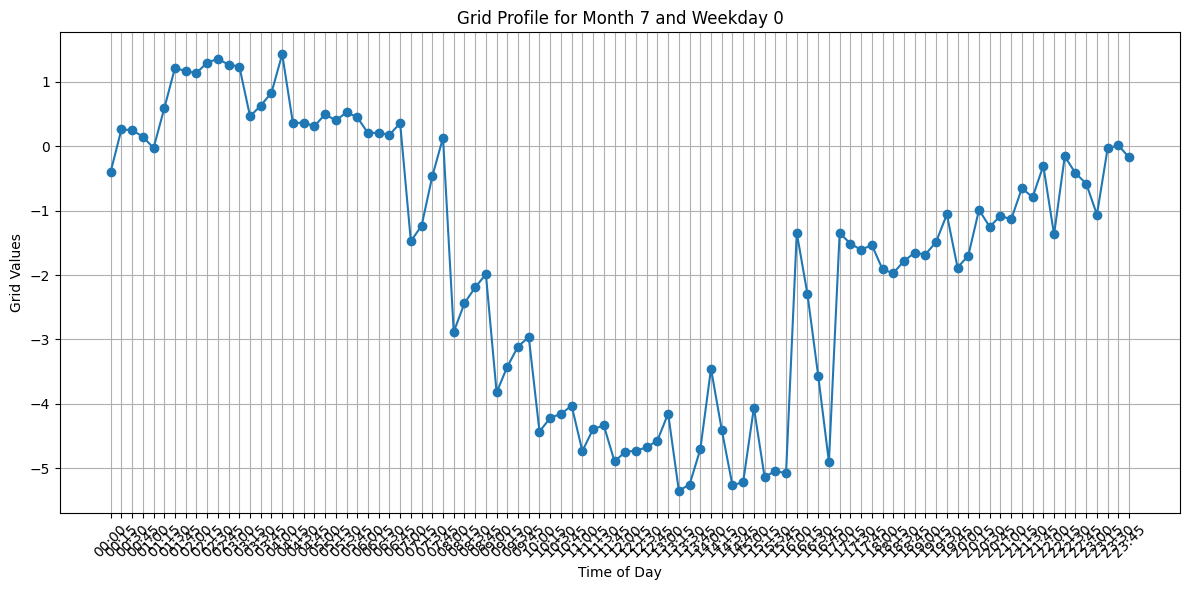

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

from data_utils.dataset import PecanStreetDataset, split_dataset

def plot_grid_profile(df, month, weekday, user):
    # Filter the DataFrame based on the specified month and weekday
    filtered_df = df[(df['month'] == month) & (df['weekday'] == weekday) & (df["dataid"] == user)]
    
    # Check if there are any rows after filtering
    if filtered_df.empty:
        print(f"No data available for month {month} and weekday {weekday}.")
        return

    # Convert the 'grid' column to a list of arrays
    grid_values = filtered_df['grid'].apply(np.array).values

    # Calculate the average grid values for each 15-minute interval across all filtered rows
    averaged_grid = np.mean(np.vstack(grid_values), axis=0)

    # Generate 96 timestamps for a day at 15-minute intervals
    timestamps = pd.date_range(start='00:00', end='23:45', freq='15T').strftime('%H:%M')

    # Ensure that the lengths match
    if len(averaged_grid) != len(timestamps):
        raise ValueError(f"Length of averaged_grid ({len(averaged_grid)}) does not match length of timestamps ({len(timestamps)}).")

    # Plot the averaged grid profile
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, averaged_grid, marker='o')
    plt.title(f'Grid Profile for Month {month} and Weekday {weekday}')
    plt.xlabel('Time of Day')
    plt.ylabel('Grid Values')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

data = PecanStreetDataset(normalize=False)
normalized_data = PecanStreetDataset(normalize=True)
train_dataset, val_dataset = split_dataset(data)
train_dataset_n, val_dataset_n = split_dataset(normalized_data)
dataset = train_dataset.dataset.data
dataset_n = train_dataset_n.dataset.data
plot_grid_profile(dataset, 7, 0, 27)